## APLICAÇÃO DE TÉCNICAS E APRENDIZADO DE MÁQUINA PARA CLASSIFICAR ALUNOS DE CURSOS DE IDIOMAS COM RELAÇÃO À POSSIBILIDADE DE EVASÃO ##

In [1]:
# Importação das livrarias Numpy, pandas, matplotlib e seaborn

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importando o arquivo em excel já com arquivos tratados

In [18]:
arquivo = pd.read_excel('DadosTratados.xlsx')

In [4]:
#listando o cabeçalho do arquivo

In [5]:
arquivo.head()

,Caso,Idade,Renda,Sexo,Estado Civil,Filhos,Escolaridade,Escolaridade mãe,Escolaridade pai,Idioma,...,Satisfação,Relevância para a carreira,Relevância vida pessoal,Dificuldade de aprendizado,Nivelamento,Dificuldade de conciliar a carga horaria,Funcionalidades do curso/Horarios da aula,Metodologia/Integração,Disciplina/Relacionamento com o professor,Satisfação com o IE
0,1,24,1,1,1,1,1,1,1,1,...,1,1,6,1,1,1,1,1,1,1
1,1,21,2,1,1,1,1,2,1,1,...,2,1,1,2,2,2,1,1,1,2
2,1,47,2,2,2,2,6,3,2,1,...,2,2,2,1,3,1,2,2,1,2
3,1,24,3,2,1,1,1,2,3,1,...,2,1,1,1,3,1,2,1,2,1
4,1,20,1,1,1,1,1,1,4,1,...,3,1,1,1,3,1,3,3,2,3


In [6]:
# Informações do arquivo

In [7]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Caso                                       309 non-null    int64
 1   Idade                                      309 non-null    int64
 2   Renda                                      309 non-null    int64
 3   Sexo                                       309 non-null    int64
 4   Estado Civil                               309 non-null    int64
 5   Filhos                                     309 non-null    int64
 6   Escolaridade                               309 non-null    int64
 7   Escolaridade mãe                           309 non-null    int64
 8   Escolaridade pai                           309 non-null    int64
 9   Idioma                                     309 non-null    int64
 10  Idade que fez o curso                      309 non

In [8]:
#Gerando Gráficos

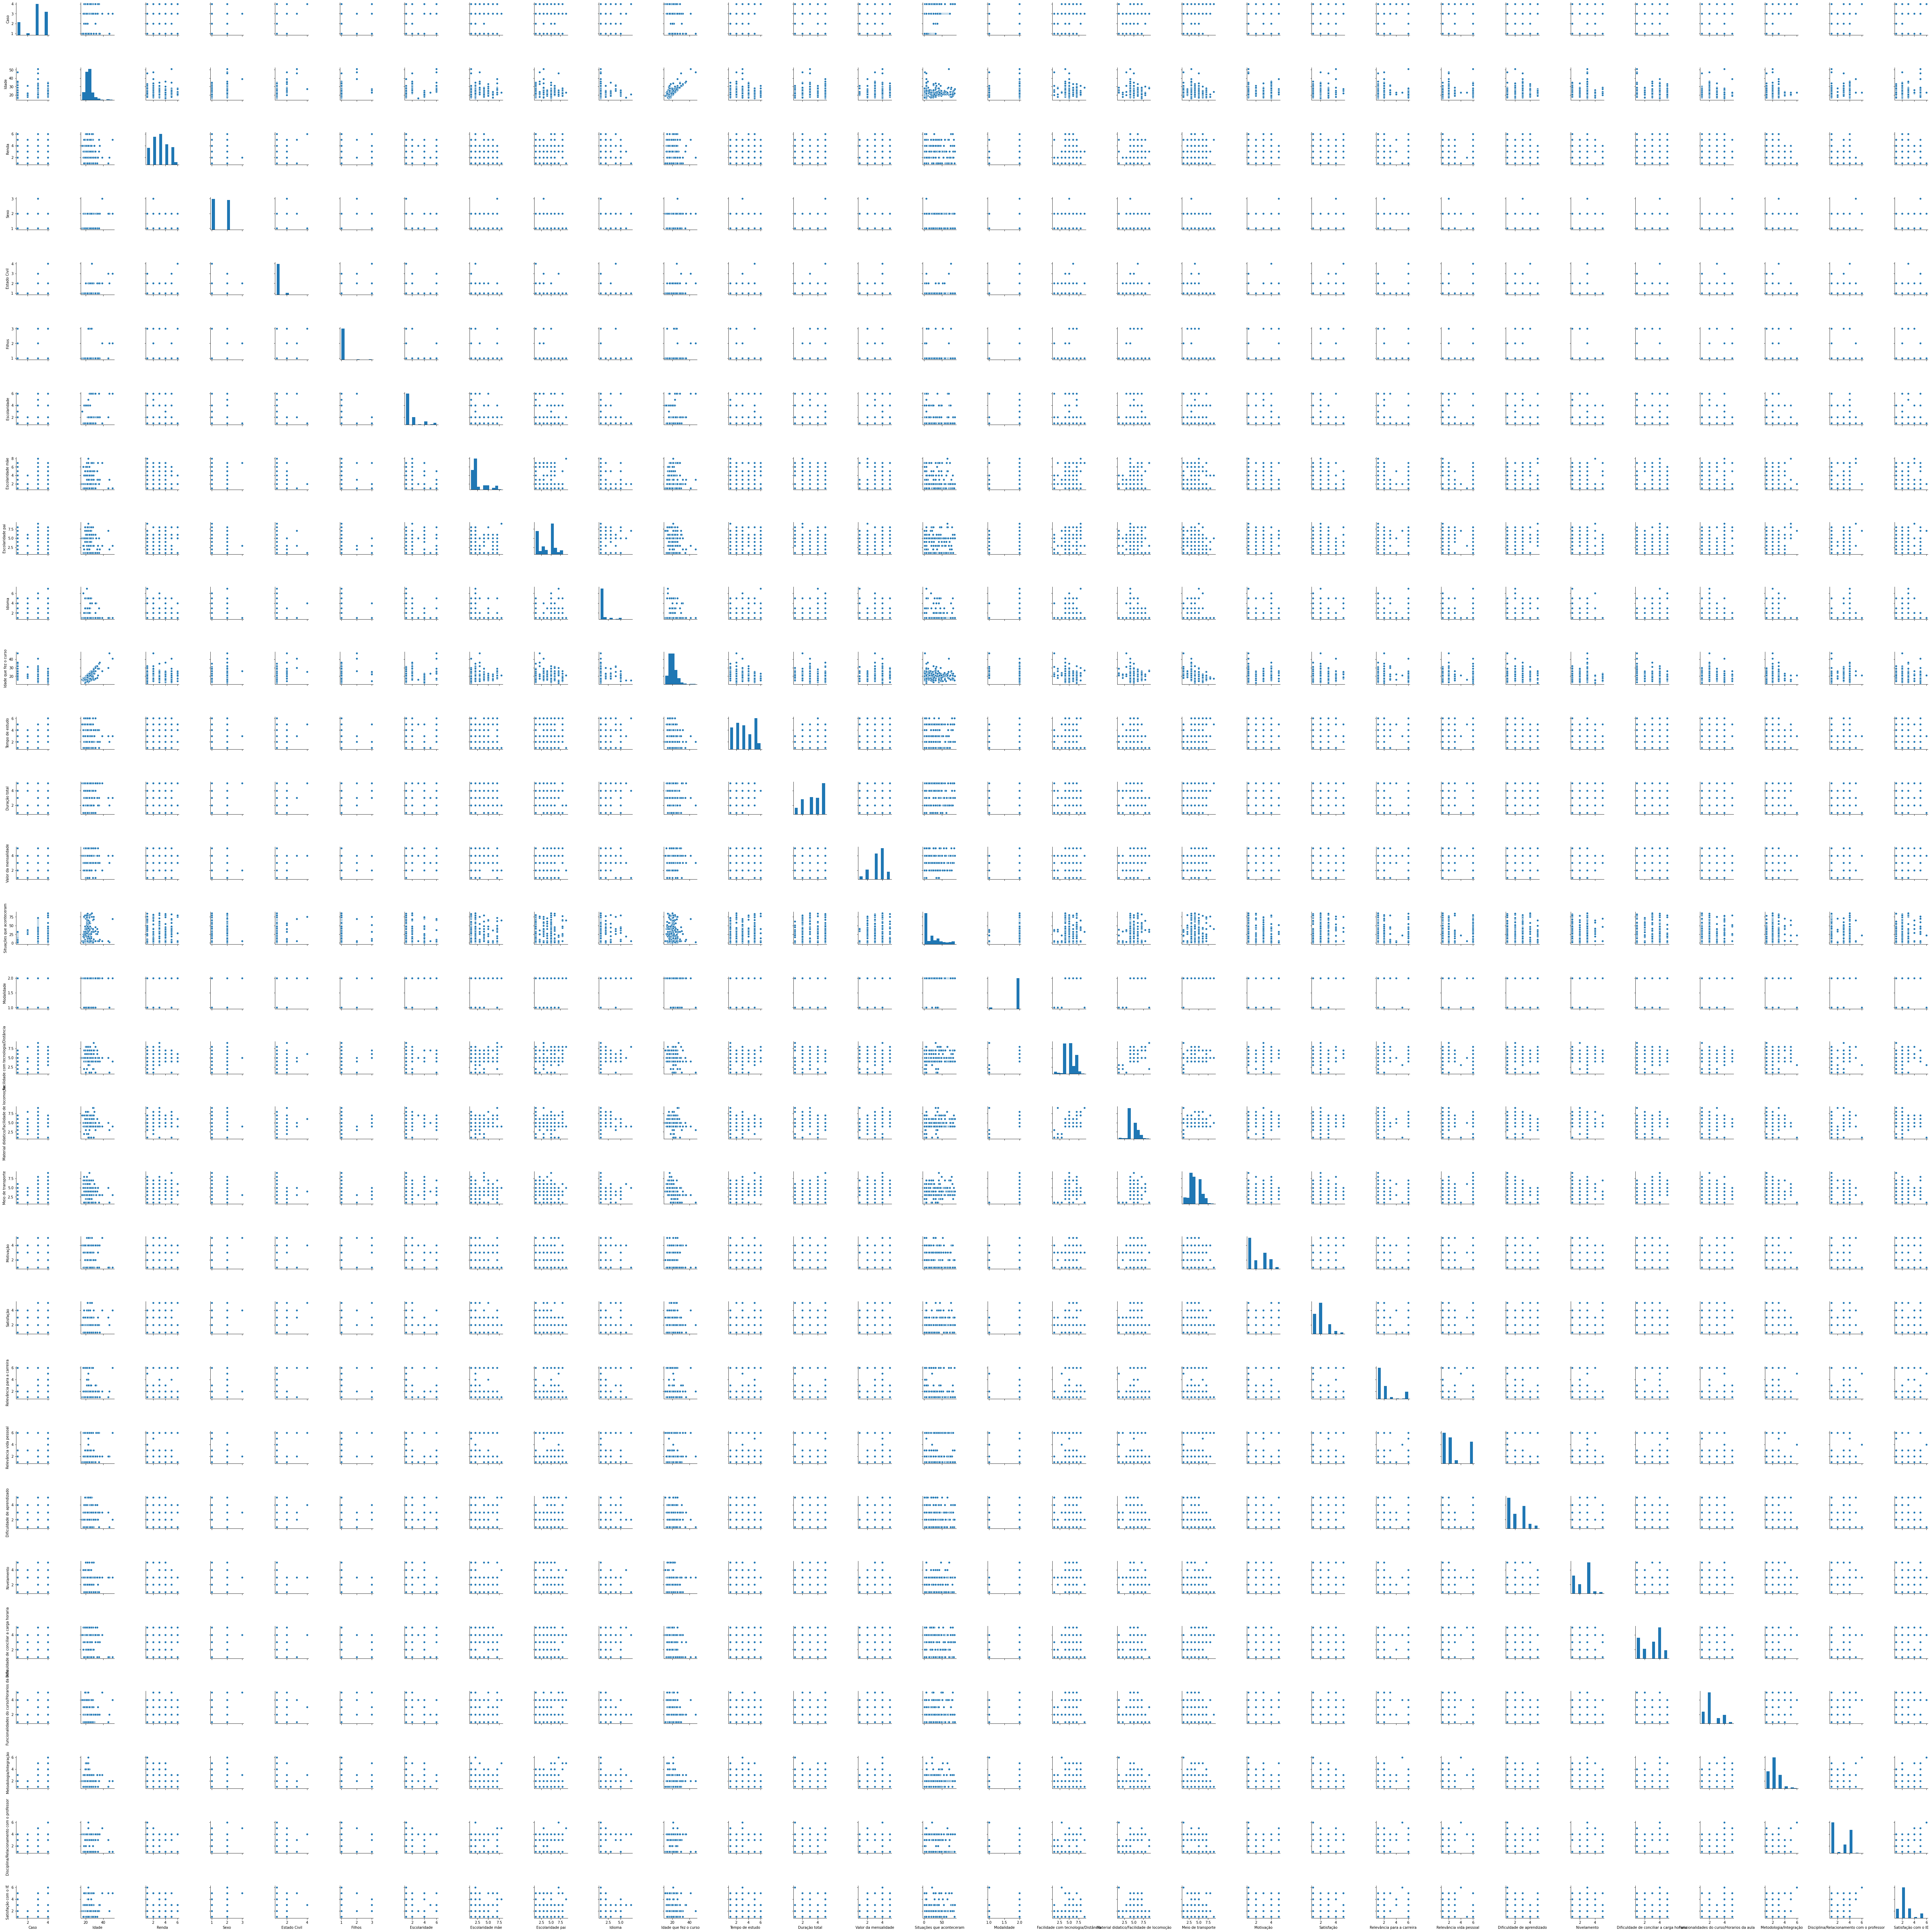

In [9]:
sns.pairplot(arquivo)

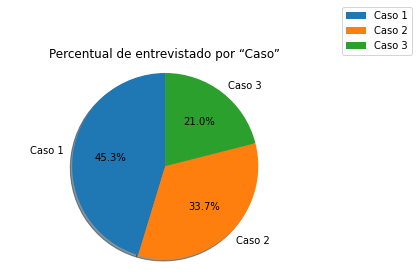

In [19]:
caso = arquivo['Caso'].value_counts()
legenda = ['Caso 1', 'Caso 2', 'Caso 3']

# Atribuindo um título ao gráfico
plt.title('Percentual de entrevistado por “Caso”')

#Criação do Gráfico
plt.pie(caso, autopct='%1.1f%%', shadow=True, startangle=90, labels=legenda)

#Adiciona Legenda
plt.legend(legenda, bbox_to_anchor=(1.3, 1.3), loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.show()

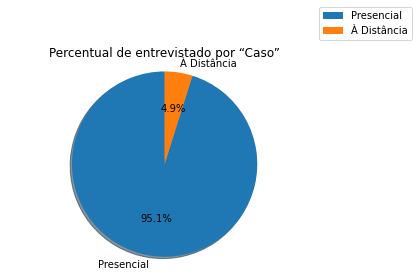

In [20]:
modalidade = arquivo['Modalidade'].value_counts()
legenda_mod = ['Presencial', 'À Distância']

# Atribuindo um título ao gráfico
plt.title('Percentual de entrevistado por “Caso”')

#Criação do Gráfico
plt.pie(modalidade, labels=legenda_mod, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(legenda_mod, bbox_to_anchor=(1.3, 1.3), loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.show()

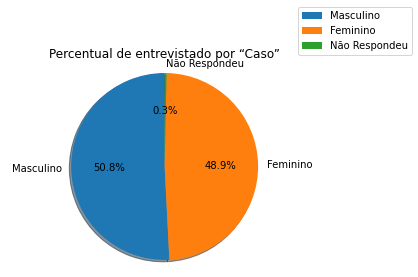

In [21]:
sexo = arquivo['Sexo'].value_counts()
legenda_sex = ['Masculino', 'Feminino', 'Não Respondeu']

# Atribuindo um título ao gráfico
plt.title('Percentual de entrevistado por “Caso”')

#Criação do Gráfico
plt.pie(sexo, labels=legenda_sex, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(legenda_sex, bbox_to_anchor=(1.3, 1.3), loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.show()

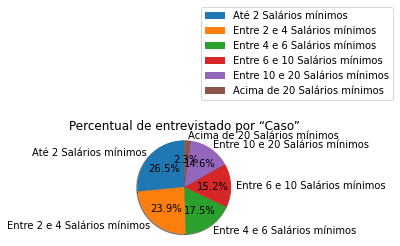

In [22]:
renda = arquivo['Renda'].value_counts()
legenda_renda = ['Até 2 Salários mínimos', 'Entre 2 e 4 Salários mínimos', 'Entre 4 e 6 Salários mínimos', 'Entre 6 e 10 Salários mínimos', 'Entre 10 e 20 Salários mínimos', 'Acima de 20 Salários mínimos']

# Atribuindo um título ao gráfico
plt.title('Percentual de entrevistado por “Caso”')

#Criação do Gráfico
plt.pie(renda, labels=legenda_renda, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(legenda_renda, bbox_to_anchor=(1.3, 1.3), loc='lower right',)

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.show()

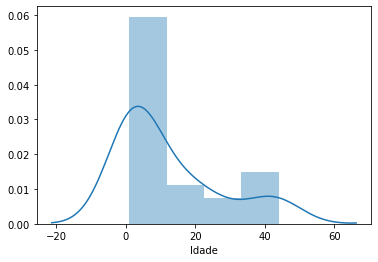

In [23]:
idade = arquivo['Idade'].value_counts()
sns.distplot(idade)

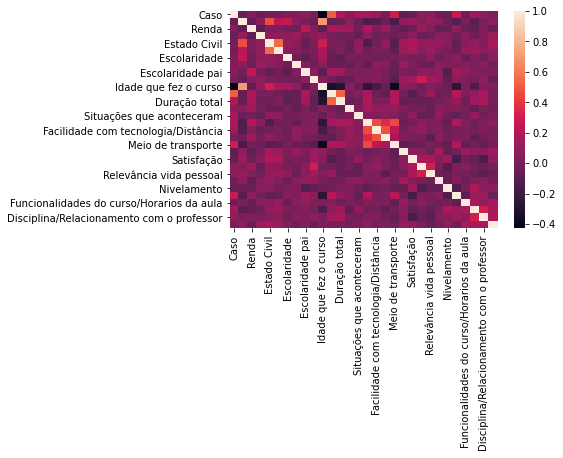

In [24]:
corr = arquivo.corr()
sns.heatmap(corr)

In [25]:
#importando livrarias para Começar o Machine Learning
#Primeiro método utilizado: KNN

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(arquivo.drop('Caso', axis=1))

StandardScaler()

In [29]:
#Gerando padronização da tabela para aprendizagem

In [30]:
arquivo_padronizado = scaler.transform(arquivo.drop('Caso', axis=1))

In [31]:
arquivo_padronizado

array([[ 0.10230695, -1.49911287, -0.97776054, ..., -1.19988045,
        -0.99976552, -1.2324735 ],
       [-0.60544336, -0.75557214, -0.97776054, ..., -1.19988045,
        -0.99976552, -0.29676266],
       [ 5.52839267, -0.75557214,  0.99693232, ..., -0.06950527,
        -0.99976552, -0.29676266],
       ...,
       [ 0.57414049,  0.73150933,  0.99693232, ...,  1.06086991,
         1.11617657, -0.29676266],
       [ 0.33822372, -0.0120314 , -0.97776054, ..., -0.06950527,
        -0.99976552, -0.29676266],
       [-0.36952659, -1.49911287,  0.99693232, ..., -0.06950527,
        -0.99976552, -0.29676266]])

In [32]:
arquivo_param = pd.DataFrame(arquivo_padronizado, columns=arquivo.columns[1:])

In [33]:
arquivo_param.head()

,Idade,Renda,Sexo,Estado Civil,Filhos,Escolaridade,Escolaridade mãe,Escolaridade pai,Idioma,Idade que fez o curso,...,Satisfação,Relevância para a carreira,Relevância vida pessoal,Dificuldade de aprendizado,Nivelamento,Dificuldade de conciliar a carga horaria,Funcionalidades do curso/Horarios da aula,Metodologia/Integração,Disciplina/Relacionamento com o professor,Satisfação com o IE
0,0.102307,-1.499113,-0.977761,-0.240844,-0.156072,-0.487815,-0.865593,-1.315430,-0.381462,0.858529,...,-1.094812,-0.591964,1.597825,-0.996663,-1.339102,-1.45841,-1.241801,-1.199880,-0.999766,-1.232474
1,-0.605443,-0.755572,-0.977761,-0.240844,-0.156072,-0.487815,-0.271219,-1.315430,-0.381462,0.187487,...,0.021679,-0.591964,-0.858533,-0.114231,-0.351554,-0.71599,-1.241801,-1.199880,-0.999766,-0.296763
2,5.528393,-0.755572,0.996932,2.860028,3.553649,3.608239,0.323155,-0.844981,-0.381462,6.003188,...,0.021679,0.011722,-0.367261,-0.996663,0.635994,-1.45841,-0.250286,-0.069505,-0.999766,-0.296763
3,0.102307,-0.012031,0.996932,-0.240844,-0.156072,-0.487815,-0.271219,-0.374532,-0.381462,0.858529,...,0.021679,-0.591964,-0.858533,-0.996663,0.635994,-1.45841,-0.250286,-1.199880,-0.294451,-1.232474
4,-0.841360,-1.499113,-0.977761,-0.240844,-0.156072,-0.487815,-0.865593,0.095917,-0.381462,-0.036194,...,1.138171,-0.591964,-0.858533,-0.996663,0.635994,-1.45841,0.741230,1.060870,-0.294451,0.638948


In [34]:
#Separação de dados para teste e treinamento de ML

In [35]:
X_train, X_test, y_train, y_test = train_test_split(arquivo_param, arquivo['Caso'], test_size=0.3)

In [36]:
#Importando o método KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#Realizando o treinamento

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
pred = knn.predict(X_test)

In [42]:
#importando os métodos para avaliação da aprendizagem

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.36      0.45      0.40        20
           2       0.56      0.44      0.49        43
           3       0.56      0.63      0.59        30

    accuracy                           0.51        93
   macro avg       0.49      0.51      0.50        93
weighted avg       0.52      0.51      0.51        93



In [45]:
print(confusion_matrix(y_test, pred))

[[ 9  8  3]
 [12 19 12]
 [ 4  7 19]]


In [46]:
#Teste matriz para verificar o melhor vizinho no intervalo de 1 a 40

Text(0, 0.5, 'Taxa de Erro')

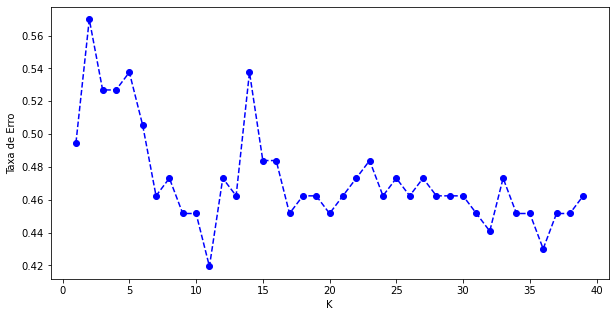

In [47]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')

In [39]:
#refazendo com o dado considerado melhor vizinho

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.43      0.18      0.25        17
           2       0.56      0.87      0.68        39
           3       0.88      0.59      0.71        37

    accuracy                           0.63        93
   macro avg       0.62      0.55      0.55        93
weighted avg       0.66      0.63      0.61        93



In [42]:
print(confusion_matrix(y_test, pred))

[[ 3 13  1]
 [ 3 34  2]
 [ 1 14 22]]


In [43]:
#Método por Arvore de decisão

In [44]:
X = arquivo.drop('Caso',axis=1)
y = arquivo['Caso']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [46]:
#importando a biblioteca de arvore de decisão

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree = DecisionTreeClassifier()

In [49]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
#Previsão e avaliaçãp

In [51]:
predictions = dtree.predict(X_test)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.56      0.45      0.50        22
           2       0.65      0.51      0.57        47
           3       0.53      0.83      0.65        24

    accuracy                           0.58        93
   macro avg       0.58      0.60      0.57        93
weighted avg       0.60      0.58      0.57        93



In [53]:
print(confusion_matrix(y_test,predictions))

[[10  9  3]
 [ 8 24 15]
 [ 0  4 20]]


In [54]:
#Florestas aleatórias

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test,rfc_pred))

[[ 9 11  2]
 [ 2 39  6]
 [ 0  3 21]]


In [58]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.82      0.41      0.55        22
           2       0.74      0.83      0.78        47
           3       0.72      0.88      0.79        24

    accuracy                           0.74        93
   macro avg       0.76      0.70      0.71        93
weighted avg       0.75      0.74      0.73        93



In [59]:
#Tentativa de PCA

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
scaler.fit(arquivo)

StandardScaler()

In [62]:
scaled_data = scaler.transform(arquivo)

In [63]:
#importando PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=2)

In [66]:
pca.fit(scaled_data)

PCA(n_components=2)

In [67]:
x_pca = pca.transform(scaled_data)

In [68]:
scaled_data.shape

(309, 30)

In [69]:
x_pca.shape

(309, 2)

Text(0, 0.5, 'Second Principal Component')

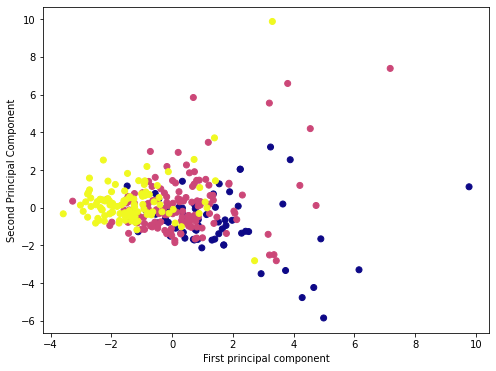

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=arquivo['Caso'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [71]:
#interpretando

In [72]:
pca.components_

array([[-0.31341547,  0.30365959, -0.14024047,  0.07854226,  0.22638644,
         0.15946378,  0.05917933,  0.05577041, -0.10901875,  0.01683283,
         0.43142806, -0.31291739, -0.24974961, -0.04212116, -0.04590113,
        -0.30741953, -0.18930953, -0.11963515, -0.30011712,  0.10516142,
         0.12951903,  0.03725804, -0.01104404,  0.0329117 ,  0.05478931,
        -0.23796476,  0.01331871, -0.08710461, -0.07016294,  0.02212999],
       [ 0.15595084,  0.27530232,  0.1033718 ,  0.12755363,  0.39674692,
         0.35293893,  0.1344456 ,  0.11612587,  0.09974462,  0.14164617,
         0.10834656,  0.12791893,  0.12710836,  0.07098913,  0.10959001,
         0.23158279,  0.21737642,  0.22005939,  0.06800552,  0.19712465,
         0.16163685,  0.21088515,  0.01423518,  0.15135036, -0.00920772,
         0.08933181,  0.17582402,  0.18107378,  0.21276995,  0.25404357]])

In [73]:
arquivo_comp = pd.DataFrame(pca.components_,columns=arquivo['Caso'].head(30))

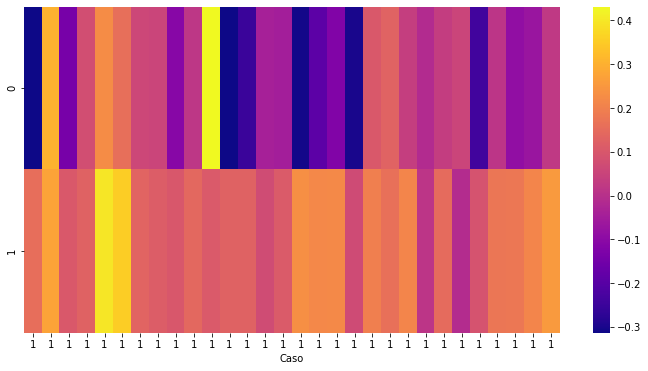

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(arquivo_comp,cmap='plasma',)